In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [3]:
tf.__version__

'2.10.0'

In [4]:
mnist = tf.keras.datasets.mnist
(x, y), (x_test, y_test) = mnist.load_data()

label 5


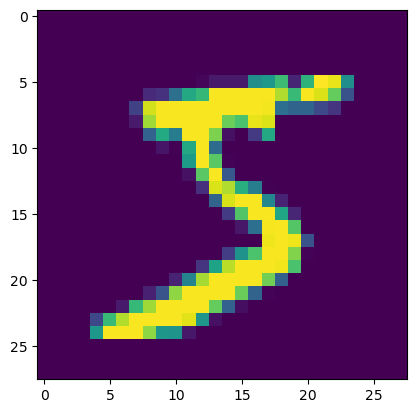

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x[0])
print('label', y[0])

label:  0


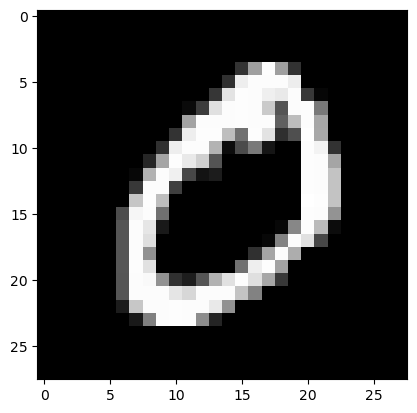

In [6]:
plt.imshow(x[1], cmap='gray')
print('label: ', y[1])

In [7]:
import numpy as np
np.set_printoptions(linewidth=120)
print(x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [8]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # units: number of nuerons
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
750/750 [==============================] - 2s 3ms/step - loss: 3.5352 - accuracy: 0.7482 - val_loss: 0.7368 - val_accuracy: 0.8238
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.6147 - accuracy: 0.8606 - val_loss: 0.5117 - val_accuracy: 0.8870
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.4247 - accuracy: 0.8975 - val_loss: 0.3779 - val_accuracy: 0.9086
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.3308 - accuracy: 0.9166 - val_loss: 0.3274 - val_accuracy: 0.9272
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.2805 - accuracy: 0.9259 - val_loss: 0.3035 - val_accuracy: 0.9214


Text(0, 0.5, 'accuracy')

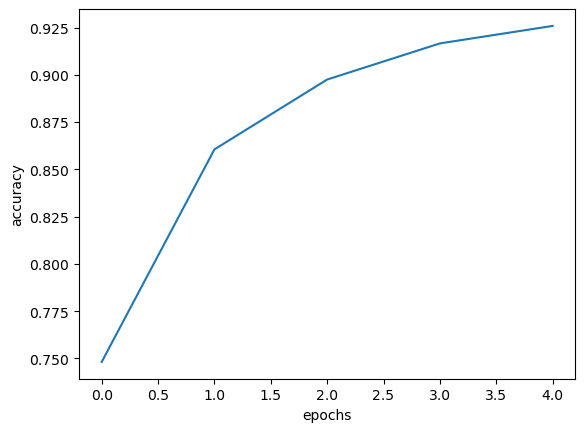

In [12]:
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
display('테스트 데이터 정확도: ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3288 - accuracy: 0.9219


'테스트 데이터 정확도: '

0.9218999743461609

In [14]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
prediction[0]

array([0.0000000e+00, 3.8177760e-12, 9.2389982e-06, 4.7423452e-08, 7.7758861e-15, 2.5768615e-10, 1.1712234e-30,
       9.9999064e-01, 1.0062176e-20, 4.0816084e-10], dtype=float32)

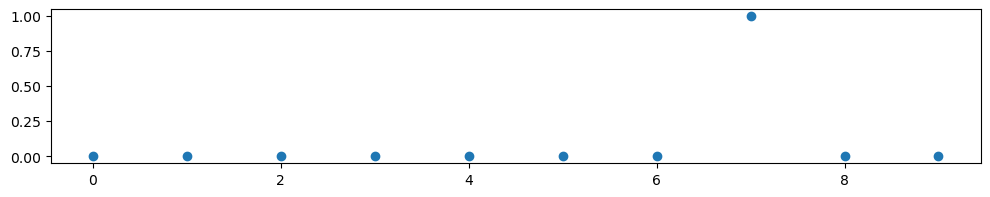

In [16]:
plt.figure(figsize=(12,2))
plt.plot(prediction[0], 'o')

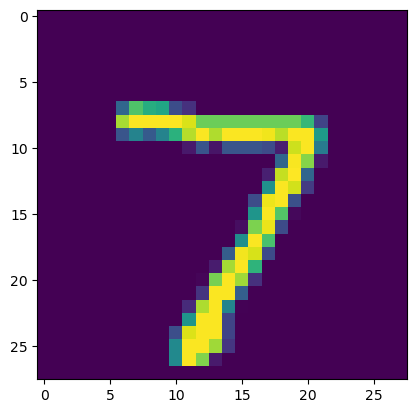

In [17]:
plt.imshow(x_test[0])

In [18]:
prediction[1]

array([9.0117758e-10, 1.4095837e-02, 9.3240774e-01, 4.5122854e-02, 2.4081864e-10, 5.3228516e-05, 3.7498453e-06,
       4.9802018e-03, 3.3362934e-03, 1.2735939e-09], dtype=float32)

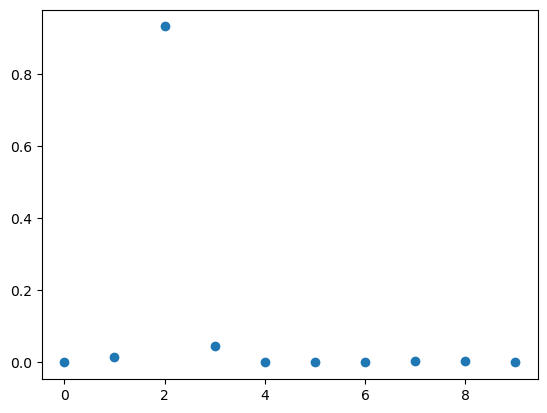

In [19]:
plt.plot(prediction[1], 'o')

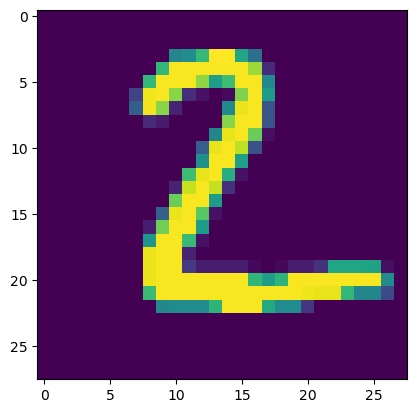

In [20]:
plt.imshow(x_test[1])